## Objective: Put qubit in superposition and measure it.

#### imports

In [36]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit_textbook.widgets import plot_bloch_vector_spherical
from math import sqrt, pi

#### create qubit

In [37]:
qubit = QuantumCircuit(1, 1)    # Creating quantum circuit with one qubit.
qubit.h(0)    # Put first qubit in superposition
qubit.measure(0, 0)    # Measure the qubit.

qubit.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

#### simulate the qubit

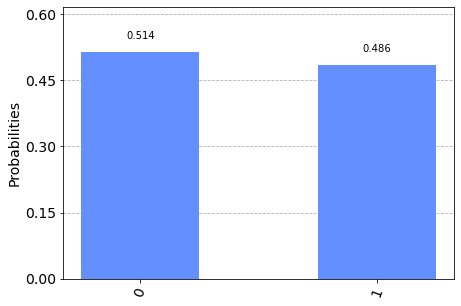

In [38]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qubit, simulator, shots=1000)    # Simulating qubit 1000 times.
result = job.result()

counts = result.get_counts(qubit)
plot_histogram(counts)

#### visualize the measurements

In [53]:
sv_sim = Aer.get_backend('statevector_simulator')

qobj = assemble(qubit)
state = sv_sim.run(qobj).result().get_statevector()

output = ""

if state[0] == 1:
    output, bloch_inpt = (0, pi*2)
else:
    output, bloch_inpt = (1, pi)

print(f'{state} -> {output}')


[0.+0.j 1.+0.j] -> 1


Since,

|0⟩ =
[
1
0
]

|1⟩ =
[
0
1
]

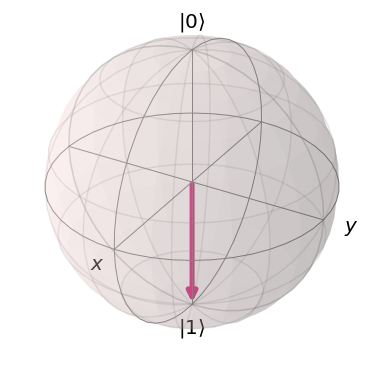

In [54]:
plot_bloch_vector_spherical([bloch_inpt, 1, 1])